In [123]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 

# 데이터 불러오기 
iris = load_iris()  

#dataframe으로 변경 
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names) 

# print(iris_df) 
#타겟 추가 
#iris_df['species'] = iris.target 
#상황에 맞는 메뉴 있음 

iris_df 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [122]:
from sklearn.preprocessing import StandardScaler  

iris_scaled = StandardScaler().fit_transform(iris_df) 

iris_scaled 

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00, -1.22474487e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00, -1.22474487e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00

# k-means k=3 

In [125]:
from sklearn.cluster import KMeans 

# K-평균 군집화 알고리즘 모델 생성하기 

kmeans_3 = KMeans(n_clusters=3, random_state=0) 
kmeans_3.fit(iris_scaled) 


labels_3 = kmeans_3.labels_ 
centroids_3 = kmeans_3.cluster_centers_ 
labels_3, centroids_3 

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32),
 array([[ 0.01534793, -0.75811468,  0.28418713,  0.18252996,  0.07348469],
        [-1.01457897,  0.85326268, -1.30498732, -1.25489349, -1.22474487],
        [ 0.99923104, -0.095148  ,  1.02080019,  1.07236353,  1.15126018]]))

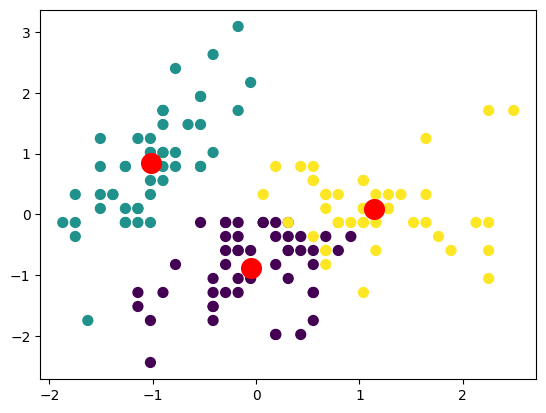

In [124]:
import matplotlib.pyplot as plt 
plt.scatter(iris_scaled[:,0], iris_scaled[:,1], c=labels_3, s=50) 

# 중심점 
plt.scatter(centroids_3[:,0], centroids_3[:,1], c='red', s=200) 

plt.show() 

In [127]:
from sklearn.metrics import silhouette_score, silhouette_samples 

# 전체 실루엣 점수 평균 계산 
silhouette_avg = silhouette_score(iris_scaled, labels_3) 

silhouette_avg 

np.float64(0.4810846252557211)

In [126]:
# 개별 실루엣 점수 
sample_silhouette_values = silhouette_samples(iris_scaled, labels_3) 

sample_silhouette_values[:10] 

array([0.74693071, 0.60269512, 0.69781218, 0.6472018 , 0.73978842,
       0.6216644 , 0.71468266, 0.74573421, 0.52639336, 0.65758253])

In [131]:
# 클러스터별 평균 실루엣 점수 계산 
unique_labels = set(labels_3) 

silhouette_avg_per_cluster = {} 

for label in unique_labels: 

    cluster_silhouette_values = sample_silhouette_values[labels_3 == label] 

    silhouette_avg_per_cluster[label] = np.mean(cluster_silhouette_values)

In [128]:
# 결과 출력 
for label, silhouette_avg in silhouette_avg_per_cluster.items(): 

    print(f'Cluster {label}: Average Silhouette Score = {silhouette_avg}')    


Cluster 0: Average Silhouette Score = 0.6807337356696789
Cluster 1: Average Silhouette Score = 0.5322582059625817


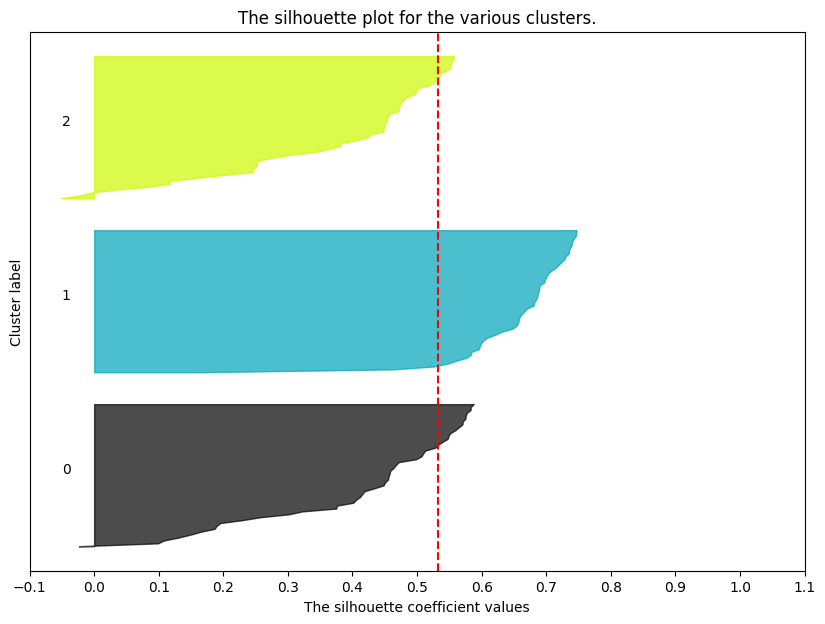

In [129]:
# 실루엣 차트 그리기 
cluster_labels = np.choose(labels_3, [0, 1, 2]) 

fig, ax1 = plt.subplots(figsize=(10, 7)) 

y_lower = 10 

for i in range(3): #클러스터 3개 

    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i] 

    ith_cluster_silhouette_values.sort()     

    size_cluster_i = ith_cluster_silhouette_values.shape[0] 

    y_upper = y_lower + size_cluster_i  

    color = plt.cm.nipy_spectral(float(i) / 3) 

    ax1.fill_betweenx(np.arange(y_lower, y_upper), 

                      0, ith_cluster_silhouette_values, 

                      facecolor=color, edgecolor=color, alpha=0.7) 

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) 

    y_lower = y_upper + 10  # 다음 클러스터로 이동 

ax1.set_title("The silhouette plot for the various clusters.") 

ax1.set_xlabel("The silhouette coefficient values") 

ax1.set_ylabel("Cluster label") 


ax1.axvline(x=silhouette_avg, color="red", linestyle="--") 

ax1.set_yticks([]) 

ax1.set_xticks(np.arange(-0.1, 1.1, 0.1)) 

plt.show() 

# K= 2 일때

Cluster 0: Average Silhouette Score = 0.6807337356696789
Cluster 1: Average Silhouette Score = 0.5322582059625817


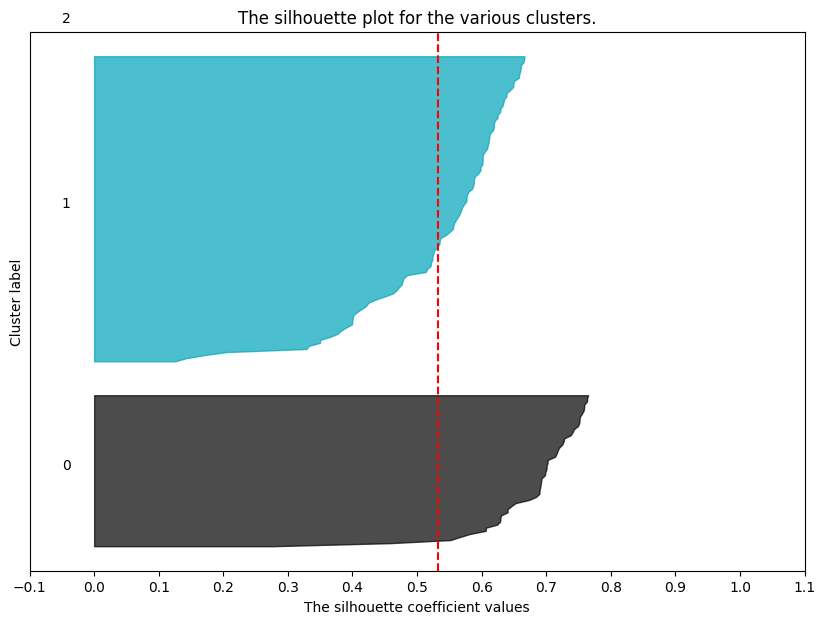

In [ ]:
# sklearn의 KMeans 모듈 불로오기
from sklearn.cluster import KMeans

# KMeans 알고리즘 2개의 클러스터 생성
kmeans_2 = KMeans(n_clusters=2, random_state=0)
# iris 데이터를 학습
kmeans_2.fit(iris_scaled)

# 각 데이터 포인트의 클러스터 레이블 가져옴
labels_2 = kmeans_2.labels_
# 각 클러스터의 중심점 가져옴
centroids_2 = kmeans_2.cluster_centers_

# 실루엣 평균 점수 계산
silhouette_avg = silhouette_score(iris_scaled, labels_2)

# 각 데이터 포인트의 실루엣 샘플 값 계산
sample_silhouette_values = silhouette_samples(iris_scaled, labels_2)

# 각 클러스터의 실루엣 점수 평균 계산
unique_labels = set(labels_2)
silhouette_avg_per_cluster = {}
for label in unique_labels:
    cluster_silhouette_values = sample_silhouette_values[labels_2 == label]
    silhouette_avg_per_cluster[label] = np.mean(cluster_silhouette_values)

# 각 클러스터의 실루엣 점수 평균 출력
for label, silhouette_avg in silhouette_avg_per_cluster.items():
    print(f'Cluster {label}: Average Silhouette Score = {silhouette_avg}')

# 실루엣 플롯 차트 그리기
cluster_labels = labels_2
fig, ax1 = plt.subplots(figsize=(10, 7))
y_lower = 10
for i in range(3): # 클러스터 3개
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10 # 다음 클러스터로 이동

# 
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# 평균 실루엣 점수를 빨간색 점선으로 표시
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.1))

plt.show()


# PCA 분석

In [130]:
from sklearn.decomposition import PCA

pca = PCA()
pccomponents = pca.fit_transform(iris_scaled)
pccomponents

array([[-2.57612023e+00,  4.74499270e-01,  5.43641514e-02,
         1.03224070e-01, -3.22738312e-02],
       [-2.41532249e+00, -6.78091967e-01,  2.03080307e-01,
         6.49621180e-02, -1.07023054e-01],
       [-2.65933256e+00, -3.48281935e-01, -1.12681278e-01,
         4.61763490e-02, -3.25552498e-02],
       [-2.60199054e+00, -6.03305942e-01, -1.34287750e-01,
         6.28947987e-04,  6.60724320e-02],
       [-2.68374418e+00,  6.40220395e-01, -1.02711326e-01,
         8.69237899e-02,  2.84500872e-02],
       [-2.41219305e+00,  1.48486231e+00, -3.39188384e-02,
        -4.49292771e-02, -1.98590342e-03],
       [-2.72650791e+00,  4.03743320e-02, -3.85007100e-01,
        -6.37655541e-02,  4.08381153e-02],
       [-2.54754039e+00,  2.17843045e-01,  3.11470499e-02,
         7.14914589e-02,  1.93738176e-02],
       [-2.63111739e+00, -1.12151504e+00, -1.85553843e-01,
        -2.13919023e-02,  2.84276305e-02],
       [-2.50568834e+00, -4.73753105e-01,  1.89304165e-01,
         1.32591701e-01

In [ ]:
# 각 성분별 설명력 조회 
exp_vratio = pca.explained_variance_ 
exp_vratio 

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

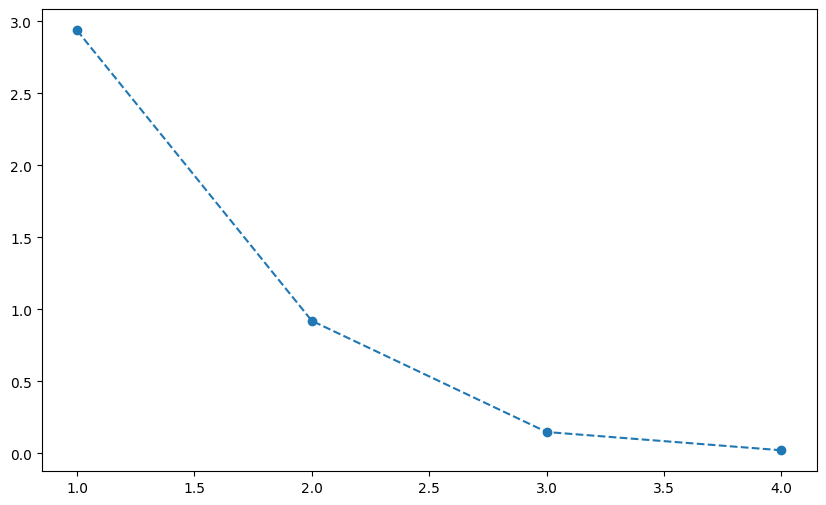

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,len(exp_vratio)+1), exp_vratio, marker='o', linestyle='--')

In [133]:
# 두개싀 속성 골라서 Kmeans로 해볼겁니다

pca2 = PCA(n_components=2) # 주성분 2개로 만들어

p_comp2 = pca2.fit_transform(iris_scaled)
p_comp2_df = pd.DataFrame(data= p_comp2, columns=['PC1', 'PC2'])
p_comp2_df

,PC1,PC2
0,-2.576120,0.474499
1,-2.415322,-0.678092
2,-2.659333,-0.348282
3,-2.601991,-0.603306
4,-2.683744,0.640220
...,...,...
145,2.233024,0.389352
146,1.966862,-0.896264
147,1.928996,0.268890
148,1.806149,1.009217


In [132]:
#타겟 추가 
iris_df['species'] = iris.target

final_df = pd.concat([p_comp2_df, iris_df['species']], axis=1) 
final_df 

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [ ]:
# KMeans k=3 짜리 모델을 만들고 실루엣 계수를 평가하는 코드

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples # 실루엣 계

# KMeans 모델 학습
kmeans = KMeans(n_clusters=3, random_state=0)

# 클러스터 라벨 예측
cluster_labels = kmeans.fit_predict(final_df)

# 실루엣 계수 계산
score = silhouette_score(final_df, cluster_labels)
samples = silhouette_samples(final_df, cluster_labels)

print(f"Silhouette Score: {score}")
# print(f"Silhouette Samples: {samples}")

Silhouette Score: 0.5020031935718894


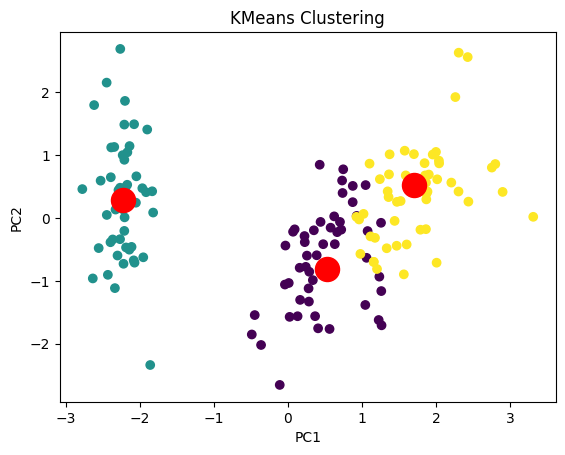

In [135]:
plt.scatter(final_df['PC1'], final_df['PC2'], c=cluster_labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('KMeans Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
from sklearn.cluster import KMeans 
# K-평균 군집화 알고리즘 모델 생성하기 

k_means = [2,3] 

for k in k_means: 
    # K-평균 클러스터링 수행     
    pca_kmeans = KMeans(n_clusters=k, random_state=7) 
    cluster_labels = pca_kmeans.fit_predict(final_df[['PC1', 'PC2']]) 

    # 실루엣 점수 계산 
    silhouette_values = silhouette_samples(final_df[['PC1', 'PC2']], cluster_labels) 
    # 전체 실루엣 점수 계산 
    silhouette_avg = silhouette_score(final_df[['PC1','PC2']], cluster_labels) 
    print(f'k={k}, silhouette_score : {silhouette_avg}') 

k=2, silhouette_score : 0.6145202036230452
k=3, silhouette_score : 0.5049971595655939
